# Assignment 1 - Codes for Assignment

# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [1]:
import time
import math
import multiprocessing
from multiprocessing import Pool
import prime_fn
import sqrt_fn
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    #print("Results", result)
    #print("Overall Time:", int(time.time()-tp1))
    return time.time()-tp1

Use the pool_process function to apply my_func to the data in dataRange.  
This task is so light it requires very little processing time. 

In [7]:
sqrt_fn.find_sqrt_verbose(num_list[0])
sqrt_fn.find_sqrt(num_list[1])

Task <_MainProcess name='MainProcess' parent=None started> 2 1.4142135623730951


1.4142135623730951

## Task 1

In the below the prime_fn.check_prime is connected to the poop process function:

> pool_process(prime_fn.check_prime,y[p:p+10],i)

In some cases the function is contained within a loop to demonstrate the effect of changing the number of processes i:
>for i in range(1,16):
    p = 0
    print(i,"/16")
    for j in range(30):
        time_to_complete.append(pool_process(prime_fn.check_prime,y[p:p+10],i))
    p+=10
    
Two working sets are then loaded to experiment on for the assignment:
> num_list and "primes2.txt"

Several different sets of numbers are investigated using differing pool sizes and the time taken to complete the work is measured.  We show that the time taken to complete the work shows a good fit with a negative exponential curve.  As the pool size is increased the time taken decreases at a negatively exponential rate.  We have fit a curve to the some of the time data below.
> $$a * np.exp(-b * x) + c$$



In [43]:
num_list = [15485867, 15485917, 15485927, 15485933, 15485941, 15485959,  15485989, 15485993]

with open("primes2.txt", "r") as file:
    x = file.read().replace("\n", "")

stev = 0
holder = ''
y = []
for i in list(x):
    
    if i in '1234567890':
        stev+=1
        holder+=i
        
        if stev%8==0:
            y.append(int(holder))
            stev = 0
            holder = ''


In [79]:
# run the same computation with variation in pool size to observe multiprocessing effect and store time to complete in array
# result is an array of time taken to perform the prime_fn function with varying pool sizes

time_to_complete = []

for i in range(1,16):
    p = 0
    print(i,"/16")
    for j in range(30):
        time_to_complete.append(pool_process(prime_fn.check_prime,y[p:p+10],i))
    p+=10
print(time_to_complete)

1 /16
2 /16
3 /16
4 /16
5 /16
6 /16
7 /16
8 /16
9 /16
10 /16
11 /16
12 /16
13 /16
14 /16
15 /16
[3.597992181777954, 3.573532819747925, 3.5547242164611816, 3.54988694190979, 3.5699148178100586, 3.5968878269195557, 3.574592113494873, 3.5538270473480225, 3.5533602237701416, 3.5487968921661377, 3.596435070037842, 3.578726053237915, 3.5603652000427246, 3.6141550540924072, 3.6031408309936523, 3.5479178428649902, 3.5888829231262207, 3.5700390338897705, 3.5716400146484375, 3.6049649715423584, 3.9736030101776123, 3.6051909923553467, 3.6212668418884277, 3.6374893188476562, 3.6004810333251953, 3.6141061782836914, 3.580049991607666, 3.5558130741119385, 3.5957508087158203, 3.554417848587036, 2.199270248413086, 2.1928000450134277, 2.1882429122924805, 2.1894681453704834, 2.1999831199645996, 2.1882030963897705, 2.1957037448883057, 2.1829769611358643, 2.17592191696167, 2.180353879928589, 2.186306953430176, 2.1772689819335938, 2.186440944671631, 2.2066547870635986, 2.2095589637756348, 2.1856040954589844

In [209]:
#Curve fit to data using negative exponential a * np.exp(-b * x) + c
x_axis = [i for i in range(1,16) for j in range(30)]

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, x_axis, time_to_complete,sigma)
len(x_axis)

450

Text(0, 0.5, 'Time to Complete Calculation (s)')

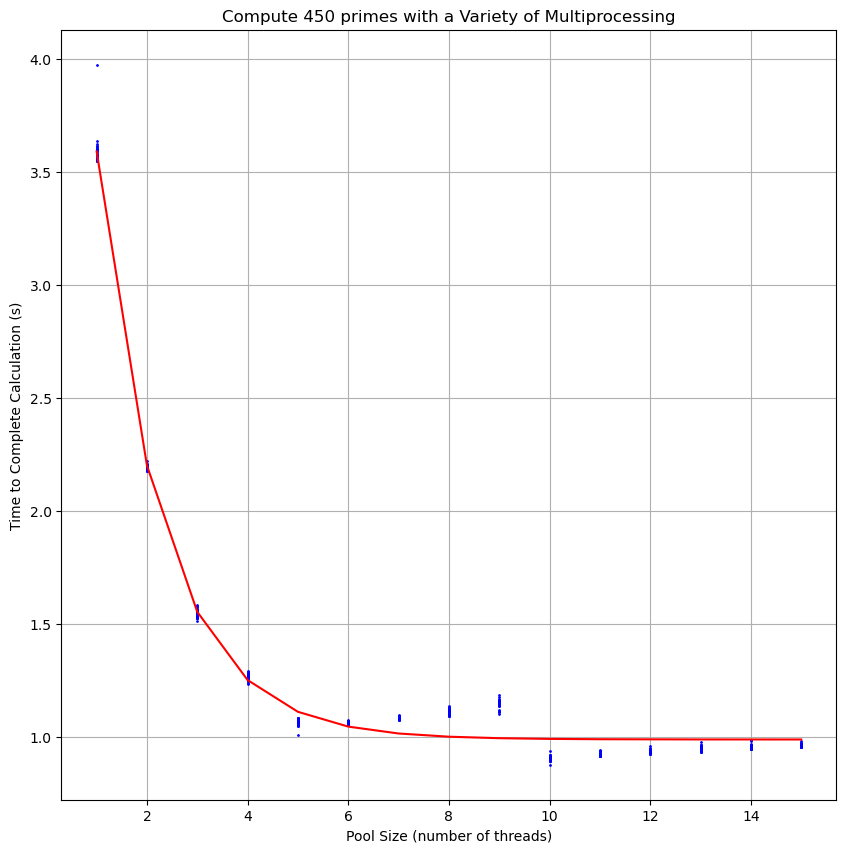

In [216]:
# plot figure to show the curve has good agreement with the negative exponential
plt.figure(figsize=(10,10))
plt.plot(x_axis,time_to_complete,'bo',markersize = 1, label='data' )
plt.plot(x_axis, func(np.array(x_axis), *popt), 'r-', label='fit')

plt.grid(True)
plt.title("Compute 450 primes with a Variety of Multiprocessing")
plt.xlabel('Pool Size (number of threads)')
plt.ylabel('Time to Complete Calculation (s)')

In [87]:
# defining some ranges for plotting later on
x_1 = y[-20:-1]
x_2 = y[-40:-21]
x_3 = y[-60:-41]
x_4 = y[-80:-61]


time_to_complete_1 = [pool_process(prime_fn.check_prime,x_1,i) for i in range(1,8)]
time_to_complete_2 = [pool_process(prime_fn.check_prime,x_2,i) for i in range(1,8)]
time_to_complete_3 = [pool_process(prime_fn.check_prime,x_3,i) for i in range(1,8)]
time_to_complete_4 = [pool_process(prime_fn.check_prime,x_4,i) for i in range(1,8)]

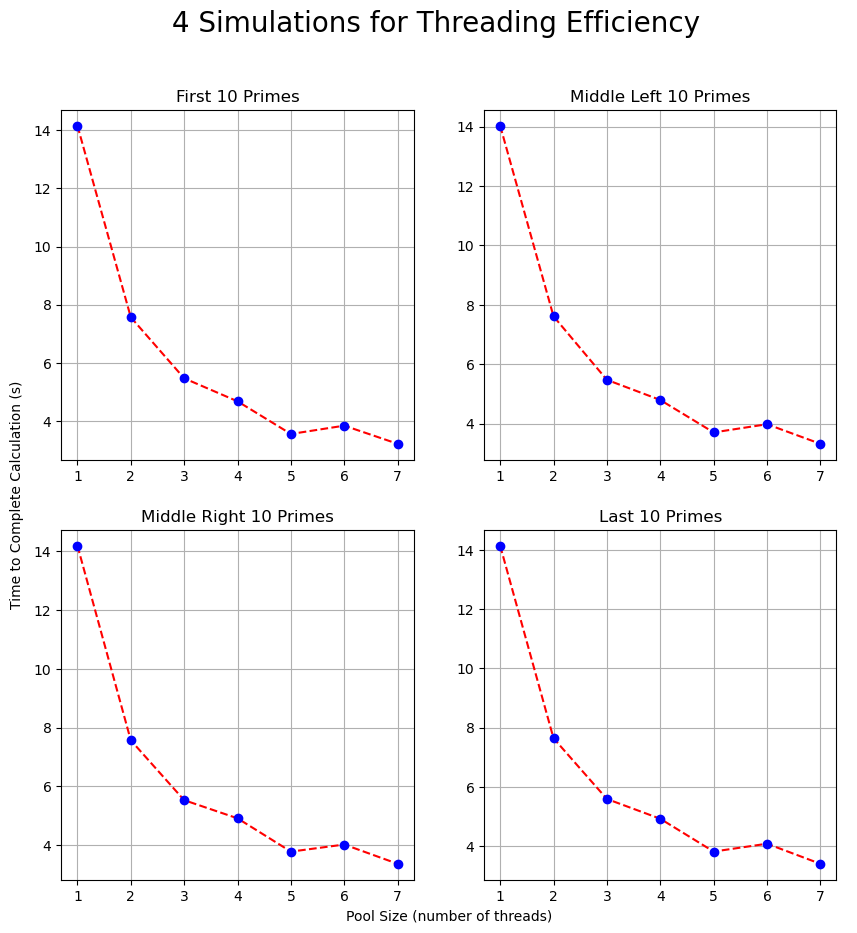

In [159]:
#plot showing that the response is stable across different sets of prime numbers. as pool size increases time
#decreases in negating exponential fashion
x_axis_all = [i for i in range(1,8)]
f = plt.figure(figsize = (10,10))
ax = f.add_subplot(111) 

ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)


ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(x_axis_all, time_to_complete_1,'r--')
ax2.plot(x_axis_all, time_to_complete_2,'r--')
ax3.plot(x_axis_all, time_to_complete_3,'r--')
ax4.plot(x_axis_all, time_to_complete_4,'r--')

ax1.plot(x_axis_all, time_to_complete_1,'bo')
ax2.plot(x_axis_all, time_to_complete_2,'bo')
ax3.plot(x_axis_all, time_to_complete_3,'bo')
ax4.plot(x_axis_all, time_to_complete_4,'bo')

ax1.title.set_text('First 10 Primes')
ax2.title.set_text('Middle Left 10 Primes')
ax3.title.set_text('Middle Right 10 Primes')
ax4.title.set_text('Last 10 Primes')


#axs[0,0].x_label('first 10 primes')
#axs[0,1].title.set_text('middle left 10 primes')
#axs[1,0].title.set_text('middle right 10 primes')
#axs[1,1].title.set_text('last 10 primes')
f.suptitle(' 4 Simulations for Threading Efficiency ', fontsize=20)

ax.set_xlabel('Pool Size (number of threads)')
ax.set_ylabel('Time to Complete Calculation (s)')

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

## Task 2 - (a) Identify an alternative task

In the below section we investigate a phenomenon relating to chemical kinetics, the study of the rates of chemical reactions.  We model a well known chemical reaction called the Three Variable Autocatalator (TVA).  The TVA has oscillatory and chaotic properties meaning that a small change in initial conditions leads to a large change in the result.  Therefore computing the equations governing this reaction is computationally intense.  In the folder I have added a python file: "bifurcation.py".  Inside are a set of functions which define the differential equations which govern the TVA.  We compute the TVA with shifting initial paramaters to demonstate an effect known as period doubling to chaos.  Notibly for this assignment multiprocessing is leveraged to compute the result and is the effectiveness is shown by means of a plot of time against pool size.  We also see how changing some initial conditions yields a different time gain compared to others, demonstrating the importance of setting up a problem correctly when leveraging multiprocessing.

In [11]:
# import python file and define a new pool process function to handle the output
#change step size inside bifurcation.py
import bifurcation

def pool_process_bifurcation(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    #print("Results", result)
    print("Overall Time:", time.time()-tp1)
    return result

In [12]:
#linspace of initial parameters
c2 = np.linspace(0.1,0.18,2000)

In [13]:
# return from bifurcation process using pool function
#load data correctly for plotting
bif_1 = pool_process_bifurcation(bifurcation.bifurcation_pool,c2,12)
bifurcation_plot = np.zeros((2,1))
for i in bif_1:
    bifurcation = np.zeros((2,len(i[0])))
    bifurcation[0] = i[0]
    bifurcation[1] = np.full((1,len(i[0])),i[1])
    bifurcation_plot = np.concatenate((bifurcation_plot,bifurcation),axis=1)

Overall Time: 151.13221406936646


In the below section  we investigate changing the number of steps in our calculation to see how it effects the time gain given by multiprocessing.

In [415]:
# Time to complete 100,000 steps
time_to_complete = []

for i in range(1,16):
    print(i,"/16")
    time_to_complete.append(pool_process_bifurcation(bifurcation.bifurcation_pool,c2,i))
        
print("Overall Time:",time_to_complete)

1 /16
2 /16
3 /16
4 /16
5 /16
6 /16
7 /16
8 /16
9 /16
10 /16
11 /16
12 /16
13 /16
14 /16
15 /16
Overall Time: [76.69760513305664, 39.47246599197388, 27.64440393447876, 22.000069856643677, 19.78946018218994, 18.937201261520386, 18.126001358032227, 16.726399898529053, 16.550118923187256, 16.15971827507019, 16.309929132461548, 17.095930814743042, 16.277828216552734, 16.425647020339966, 17.00367784500122]


In [426]:
# Time to complete 10,000 steps
time_to_complete_10 = []

for i in range(1,16):
    print(i,"/16")
    time_to_complete_10.append(pool_process_bifurcation(bifurcation.bifurcation_pool,c2,i))
        
print("Overall Time:",time_to_complete_10)

1 /16
2 /16
3 /16
4 /16
5 /16
6 /16
7 /16
8 /16
9 /16
10 /16
11 /16
12 /16
13 /16
14 /16
15 /16
Overall Time: [7.767082929611206, 4.154435157775879, 3.067077159881592, 2.4937851428985596, 2.3010387420654297, 2.2352211475372314, 2.2063260078430176, 2.0924999713897705, 2.1798288822174072, 2.220072031021118, 2.2556657791137695, 2.306442975997925, 2.377095937728882, 2.2829110622406006, 2.4746530055999756]


In [14]:
#plot the time gain of using multiple cores depending on steps
plt.figure(figsize=(12,10))
plt.plot(time_to_complete,'r--',markersize = 1,label="asd")
plt.plot(time_to_complete,'bo',markersize = 3)
plt.plot(time_to_complete_10,'g--',markersize = 1,label="asd")
plt.plot(time_to_complete_10,'yo',markersize = 3)
plt.grid(True)
plt.xlabel('Pool Size (number of threads)')
plt.ylabel('Time to Complete Calculation (s)')

NameError: name 'time_to_complete' is not defined

<Figure size 1200x1000 with 0 Axes>

(0.14, 0.18)

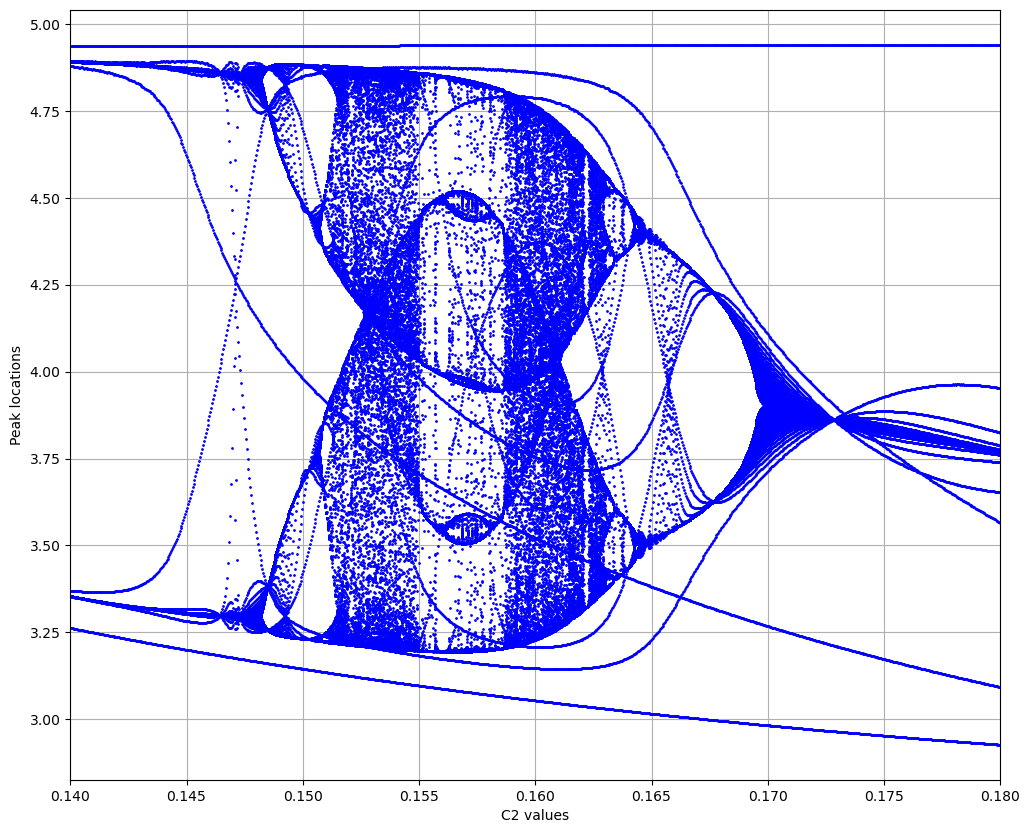

In [16]:
#Bifurcation plot.  
#We can demonstrate several effects of the TVA here, including oscillation and period doubling to chaos

plt.figure(figsize=(12,10))
plt.plot(bifurcation_plot[1,1:],np.log(bifurcation_plot[0,1:]),'bo',markersize=1)
plt.grid(True)
plt.xlabel("C2 values")
plt.ylabel("Peak locations")
plt.xlim(0.14,0.18)